In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("standardization_Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size = 0.2,random_state=0)

In [9]:
X_train.head()

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000


StandardScaler

In [11]:
# In above example if we calculate euclidian distance of two records then EstimatedSalary will dominate 
# the result so we have to standardize it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
# fit method will calculate the mean and standard deviation of data and store it
scaler.fit(X_train)

StandardScaler()

In [19]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [20]:
# applying formula to each and every instance of X_train
X_train_scaled = scaler.transform(X_train)       
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [29]:
#let's transform them into dataframe          
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [32]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,320.000000,3.200000e+02
mean,0.000000,1.110223e-17
std,1.001566,1.001566e+00
min,-1.965480,-1.591382e+00
25%,-0.798951,-7.801636e-01
50%,-0.021265,-1.240367e-02
75%,0.756421,5.235797e-01
max,2.117372,2.319848e+00


In [33]:
X_test_scaled.describe()

,Age,EstimatedSalary
count,80.000000,80.000000
mean,-0.274013,-0.026890
std,1.064621,0.936763
min,-1.965480,-1.591382
25%,-1.090583,-0.664275
50%,-0.312897,0.074513
75%,0.367578,0.472879
max,2.117372,2.319848


Effect of scaling

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

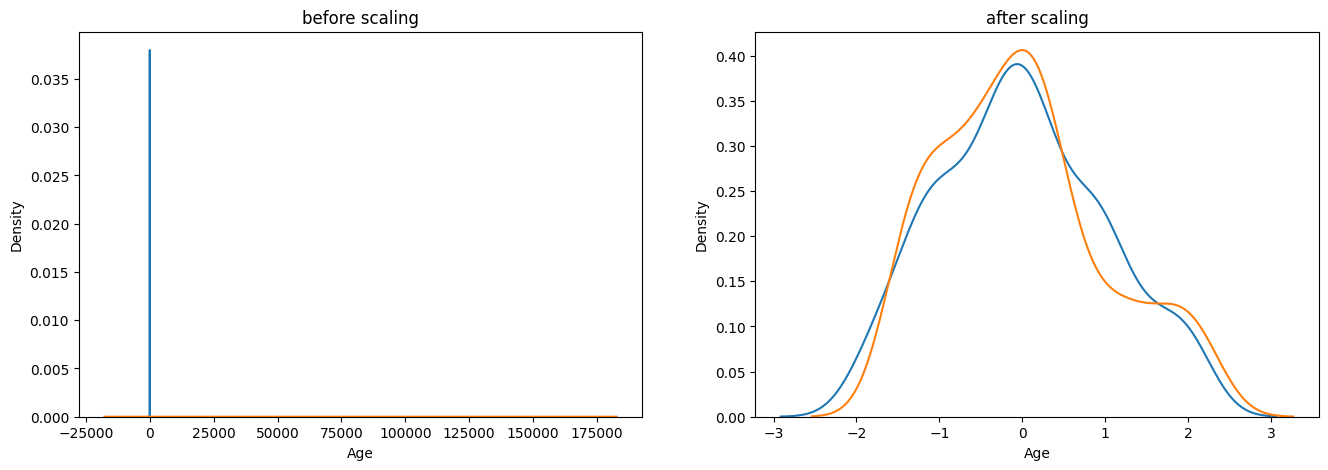

In [37]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,5))
# before scaling
ax1.set_title("before scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)
# after scaling
ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)